# Analysis of the "Train" data

1. Import packages
2. Load data
3. Analyse data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

**Data Visualization**

Before you visualize, remember to do the following:

1. Check out the .head() and .tail() of the data to get a sense of what they look like.
2. Check for nulls and decide how to handle them (Drop? Fill? With what?).
3. Check the data types of the columns using .dtypes() and adjust as necessary.
4. Remove any columns you're not interested in including and make sure the names of remaining columns are clear.
5. Get the summary statistics of the data using .describe().

In [3]:
print(train_df.describe())

                id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09


After a quick view, I find 
- There are 5 columns with numerical values. 
- 'id' is included but should actually be the index.
- The units are hard to read.

In [4]:
train_df.set_index('id', inplace=True)

In [5]:
print(train_df.describe())

             budget   popularity      runtime       revenue
count  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   2.253133e+07     8.463274   107.856571  6.672585e+07
std    3.702609e+07    12.104000    22.086434  1.375323e+08
min    0.000000e+00     0.000001     0.000000  1.000000e+00
25%    0.000000e+00     4.018053    94.000000  2.379808e+06
50%    8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2.900000e+07    10.890983   118.000000  6.891920e+07
max    3.800000e+08   294.337037   338.000000  1.519558e+09


In [6]:
print(train_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 2724 non-null object
cast                

The previous table shows most of the columns are categorical. And most of them are non-null.

In [7]:
train_df = train_df.astype({"budget":'float64', "revenue":'float64'})

In [8]:
print(train_df.describe())

             budget   popularity      runtime       revenue
count  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   2.253133e+07     8.463274   107.856571  6.672585e+07
std    3.702609e+07    12.104000    22.086434  1.375323e+08
min    0.000000e+00     0.000001     0.000000  1.000000e+00
25%    0.000000e+00     4.018053    94.000000  2.379808e+06
50%    8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2.900000e+07    10.890983   118.000000  6.891920e+07
max    3.800000e+08   294.337037   338.000000  1.519558e+09


In [9]:
print(train_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
belongs_to_collection    604 non-null object
budget                   3000 non-null float64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 2724 non-null object
cast              

In [10]:
# split numbers using commas and show only 2 decimal points
pd.set_option('display.float_format', '{:,.2f}'.format)

In [11]:
print(train_df.describe())

              budget  popularity  runtime          revenue
count       3,000.00    3,000.00 2,998.00         3,000.00
mean   22,531,334.11        8.46   107.86    66,725,851.89
std    37,026,086.41       12.10    22.09   137,532,326.34
min             0.00        0.00     0.00             1.00
25%             0.00        4.02    94.00     2,379,808.25
50%     8,000,000.00        7.37   104.00    16,807,068.00
75%    29,000,000.00       10.89   118.00    68,919,203.50
max   380,000,000.00      294.34   338.00 1,519,557,910.00


In [12]:
#The above numbers indicate 'budget' and 'revenue' are positively skewed, having a mean > median.


#Next step is to change the 'release date column' to date type

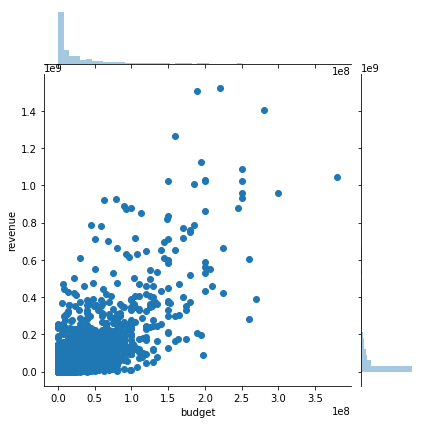

In [13]:
sns.jointplot(data=train_df, x='budget', y='revenue')
#ax.xaxis.set_major_formatter(ticker.EngFormatter())
#plt.show()

In [14]:
#The graph show that there are extreme outlayers both in the 'budget' and 'revenue' columns.

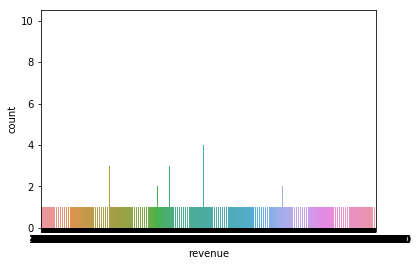

In [15]:
sns.countplot(data=train_df, x='revenue')

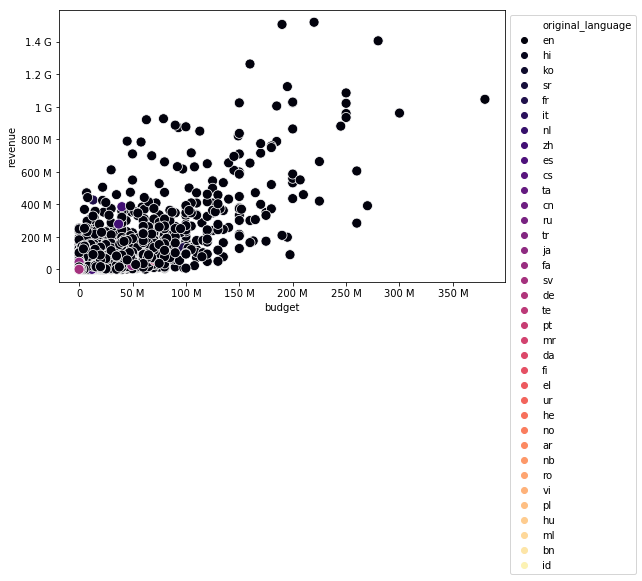

In [25]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(8, 5))    
palette = sns.color_palette("bright", 6)
cool_chart = sns.scatterplot(ax=ax, data=train_df, x='budget', y='revenue', hue='original_language', marker='o', s=100, palette="magma")
cool_chart.legend(bbox_to_anchor=(1, 1), ncol=1)
#ax.set(xlim = (50000,250000))

cool_chart.xaxis.set_major_formatter(ticker.EngFormatter())
cool_chart.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()